Pros and Cons

In [1]:
#Load all used libraries
import numpy as np 
import pandas as pd

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing

import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.metrics import adjusted_rand_score

In [2]:
#load iris dataset
mallDF = pd.read_csv("Mall_Customers.csv")

#Converting labels to numerical values
mallDF = mallDF.replace('Male',1)
mallDF = mallDF.replace('Female',0)

#drop not needed information
mallDF = mallDF.drop(columns = ["CustomerID"])

mallDF.rename(columns = {'Gender': 'GenderMale','Annual Income (k$)': 'Annual Income',
                         'Spending Score (1-100)': 'Spending Score'}, inplace = True)

In [3]:
mallDF.head()

,GenderMale,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [4]:
#features
x = mallDF.iloc[:,0:3]
#label
y = mallDF.iloc[:,-1]

In [5]:
x.head()

,GenderMale,Age,Annual Income
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17


In [6]:
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score, dtype: int64

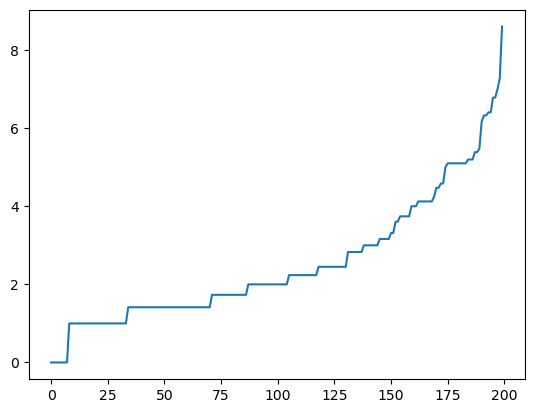

In [7]:
#Finding the optimal epsilon value using the elbow method
neigh = NearestNeighbors(n_neighbors =5)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]

plt.plot(distances)
plt.show()

# We can see that the point of maximum curvature is at 6.
# Thus, we set eps to 6
# As for min number of samples, if we do not have the domain knowledge, we can set the minimum number of samples to
# greater than or equal to the number of features.
# Thus, we set our min_samples to 3.

In [8]:
dbscan = DBSCAN(eps=6,min_samples=4)
y_pred = dbscan.fit_predict(x)

In [9]:
# We have 5 clusters, -1 is outlier
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [10]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([x,y_pred_df],axis=1)

print(val)

     GenderMale  Age  Annual Income  pred_label
0             1   19             15           0
1             1   21             15           0
2             0   20             16           0
3             0   23             16           0
4             0   31             17           0
..          ...  ...            ...         ...
195           0   35            120          -1
196           0   45            126          -1
197           1   32            126          -1
198           1   32            137          -1
199           1   30            137          -1

[200 rows x 4 columns]


<AxesSubplot:xlabel='GenderMale', ylabel='Spending Score'>

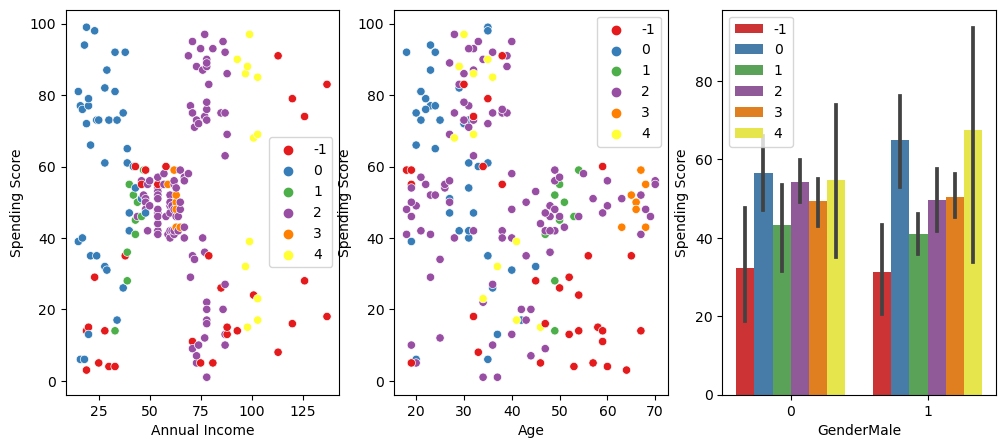

In [11]:
fig2, (axes) = plt.subplots(1,3,figsize=(12,5))
sns.scatterplot( x= val['Annual Income'],  y= y,
                hue=dbscan.labels_, ax=axes[0], palette='Set1')
sns.scatterplot( x= val['Age'],  y= y,
                hue=dbscan.labels_, ax=axes[1], palette='Set1')
sns.barplot( x= val['GenderMale'],  y= y,
                hue=dbscan.labels_, ax=axes[2], palette='Set1')

In [12]:
adjusted_rand_score(y, y_pred)

0.008314040240930664